In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import requests
%matplotlib inline

In [213]:
flaggshots = pd.read_csv('flagg.csv')
harpershots = pd.read_csv('harper.csv')

In [214]:
playersurl = f'https://api.cbbanalytics.com/api/gs/player-agg-stats/competition/38409/division/1/scope/season/'
response = requests.get(playersurl)
data = response.json()
playersdf = pd.DataFrame(data)
playersdf2 = playersdf

In [215]:
def get_player_names(lineup_str):
    # Split the homeLineupId string by dashes to get individual playerIds
    player_ids = map(int, lineup_str.split('-'))
    
    # Map playerIds to their fullNames using playerdf2
    player_names = playersdf2[playersdf2['playerId'].isin(player_ids)]['fullName'].values
    
    # Return the player names as a string, joined by commas
    return ', '.join(player_names)

# Apply the function to the homeLineupId column to create the homelineup column
flaggshots['homeLineup'] = flaggshots['homeLineupId'].apply(get_player_names)
flaggshots['awayLineup'] = flaggshots['awayLineupId'].apply(get_player_names)
harpershots['homeLineup'] = harpershots['homeLineupId'].apply(get_player_names)
harpershots['awayLineup'] = harpershots['awayLineupId'].apply(get_player_names)

In [216]:
harpershots.columns

Index(['Unnamed: 0', '_id', 'competitionId', 'homeId', 'awayId',
       'homeConferenceId', 'awayConferenceId', 'gameId', 'isNeutral',
       'inDivision', 'gameDate', 'tournamentId', 'didHomeWin', 'isExhib',
       'periodNumber', 'periodType', 'period', 'teamIdAgst', 'teamId_x',
       'playerId', 'secsIntoGame', 'clock', 'shotClock', 'actionType',
       'subType', 'success', 'x', 'y', 'hexX', 'hexY', 'shotDist', 'zones6',
       'zones13', 'zones17', 'dists7', 'awayLineupId', 'homeLineupId',
       'assisterId', 'shotContext', 'fullName', 'TeamName', 'teamId_y',
       'OpponentName', 'assisterName', 'color1', 'color2', 'homeLineup',
       'awayLineup'],
      dtype='object')

In [217]:
allshots = pd.concat([flaggshots,harpershots],axis=0)

In [218]:
flaggcolor = flaggshots['color1'].iloc[0]
flaggcolor2 = flaggshots['color2'].iloc[0]
harpercolor = harpershots['color1'].iloc[0]
harpercolor2 = harpershots['color2'].iloc[0]

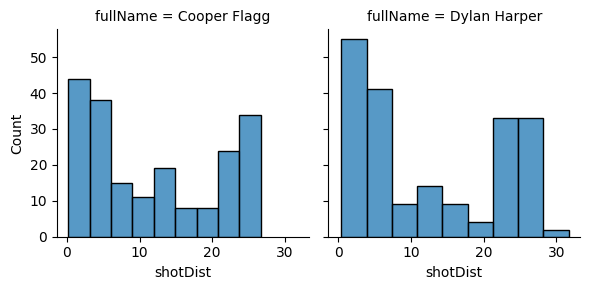

In [219]:
grid = sns.FacetGrid(col='fullName',data=allshots,palette=[flaggcolor,harpercolor])
grid.map(sns.histplot,'shotDist')

Text(0.5, 1.0, 'Make/Miss Breakdown')

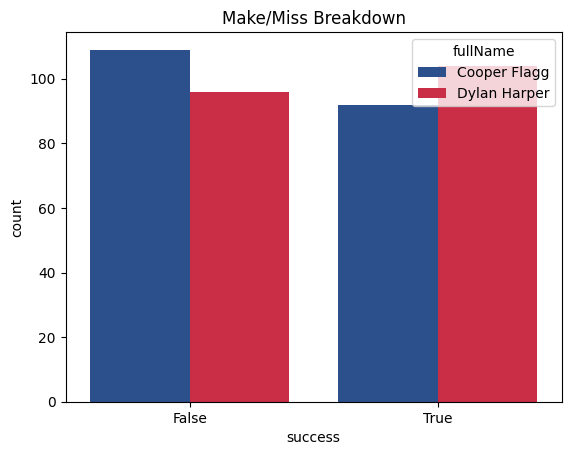

In [220]:
sns.countplot(x='success',data=allshots,hue='fullName',palette=[flaggcolor,harpercolor])
plt.title('Make/Miss Breakdown')

Text(0.5, 1.0, 'Shot Type Breakdown')

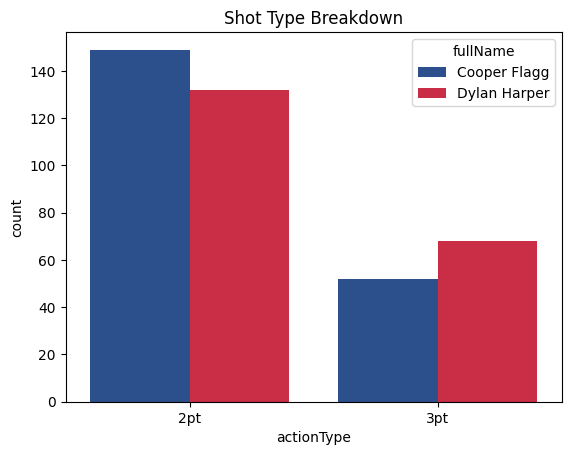

In [221]:
sns.countplot(x='actionType',data=allshots,hue='fullName',palette=[flaggcolor,harpercolor])
plt.title('Shot Type Breakdown')


In [222]:
allshots['assisted'] = np.where(allshots['assisterId'].notnull(),1,0)
flaggshots['assisted'] = np.where(flaggshots['assisterId'].notnull(),1,0)
harpershots['assisted'] = np.where(harpershots['assisterId'].notnull(),1,0)

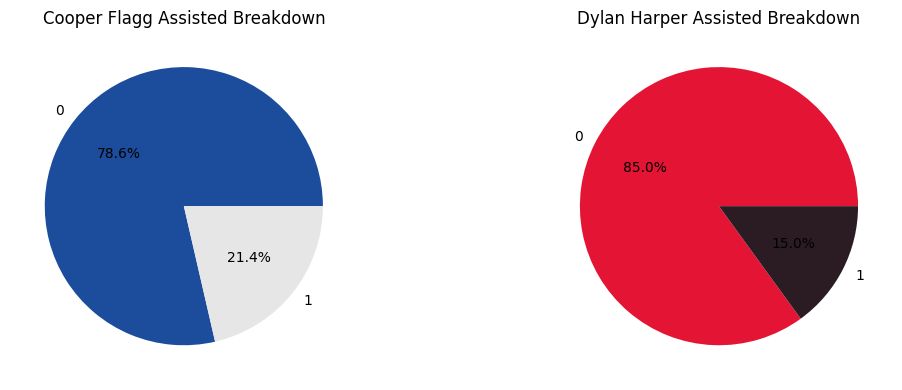

In [223]:
import matplotlib.pyplot as plt

# Get the assister counts
flaggast = flaggshots['assisted'].value_counts()
harpast = harpershots['assisted'].value_counts()
# Create subplots with 2 columns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Plot pie chart in the first subplot
ax1.pie(flaggast, labels=flaggast.index, autopct='%1.1f%%',colors=[flaggcolor,'#E6E6E6'])
ax1.set_title('Cooper Flagg Assisted Breakdown')

# You can use ax2 for a second plot
# Example: A bar chart for assister counts
ax2.pie(harpast,labels = harpast.index, autopct='%1.1f%%',colors=[harpercolor,harpercolor2])
ax2.set_title('Dylan Harper Assisted Breakdown')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [224]:
from courtCoordinates import CourtCoordinates
import plotly.express as px
import plotly.graph_objects as go  # Import Plotly graph objects separately
from datetime import datetime, timedelta
from random import randint
from courtCoordinates import CourtCoordinates
import numpy as np
import re

In [225]:
court = CourtCoordinates('2024-25')
court_lines_df = court.get_coordinates()
# st.write(court_lines_df)
fig = px.line_3d(
        data_frame=court_lines_df,
        x='x',
        y='y',
        z='z',
        line_group='line_group_id',
        color='line_group_id',
        color_discrete_map={
            'court': 'black',
            'hoop': '#e47041',
            'net': '#D3D3D3',
            'backboard': 'gray',
            'backboard2': 'gray',
            'free_throw_line': 'black',
            'hoop2':'#D3D3D3',
            'free_throw_line2': 'black',
            'free_throw_line3': 'black',
            'free_throw_line4': 'black',
            'free_throw_line5': 'black',
        }
    )
fig.update_traces(hovertemplate=None, hoverinfo='skip', showlegend=False)
fig.update_traces(line=dict(width=6))
court_perimeter_bounds = np.array([[-250, 0, -0.2], [250, 0, -0.2], [250, 450, -0.2], [-250, 450, -0.2], [-250, 0, -0.2]])

# Extract x, y, and z values for the mesh
court_x = court_perimeter_bounds[:, 0]
court_y = court_perimeter_bounds[:, 1]
court_z = court_perimeter_bounds[:, 2]

# Add a square mesh to represent the court floor at z=0
fig.add_trace(go.Mesh3d(
    x=court_x,
    y=court_y,
    z=court_z,
    color='#d2a679',
    # opacity=0.5,
    name='Court Floor',
    hoverinfo='none',
    showscale=False
))
fig.update_layout(    
    margin=dict(l=20, r=20, t=20, b=20),
    scene_aspectmode="data",
    height=600,
    scene_camera=dict(
        eye=dict(x=1.3, y=0, z=0.7)
    ),
    scene=dict(
        xaxis=dict(title='', showticklabels=False, showgrid=False, showbackground=True, backgroundcolor='rgba(0,0,0,0)'),
        yaxis=dict(title='', showticklabels=False, showgrid=False, showbackground=True, backgroundcolor='rgba(0,0,0,0)'),
        zaxis=dict(title='',  showticklabels=False, showgrid=False, showbackground=True, backgroundcolor='rgba(0,0,0,0)'),
    ),
    showlegend=False,
    legend=dict(
        yanchor='top',
        y=0.05,
        x=0.2,
        xanchor='left',
        orientation='h',
        font=dict(size=15, color='gray'),
        bgcolor='rgba(0, 0, 0, 0)',
        title='',
        itemsizing='constant'
    )
)


hover_data = flaggshots.apply(lambda row: f"""
    <b>Player:</b> {row['fullName']}<br>
    <b>Game Date:</b> {row['gameDate']}<br>
    <b>Game:</b> {row['TeamName']} vs {row['OpponentName']}<br>
    <b>Half:</b> {row['period'][-1]}<br>
    <b>Time:</b> {row['clock']}<br>
    <b>Result:</b> {'Made' if row['success'] else 'Missed'}<br>
    <b>Shot Distance:</b> {row['shotDist']} ft<br>
    <b>Shot Type:</b> {row['actionType']} ({row['subType']})<br>
    <b>Shot Clock:</b> {row['shotClock']}<br>
    <b>Assisted by:</b> {row['assisterName']}<br>
""", axis=1)
flaggshots['x'] = (-flaggshots['x']*10)+250
flaggshots['y'] = (450-flaggshots['y']*10)+10
flaggshots['color'] = np.where(flaggshots['success'] == True, 'green', 'red')
flaggshots['symbol'] = np.where(flaggshots['success'] == True, 'circle', 'cross')
flaggshots['size'] = np.where(flaggshots['success'] == True, 10, 8)

fig.add_trace(go.Scatter3d(
    x=flaggshots['x'],
    y=flaggshots['y'],
    z=[0] * len(flaggshots),  # Set z = 0 for all points
    mode='markers',
    marker=dict(size=8, color=flaggshots['color'], opacity=0.6,symbol=flaggshots['symbol']),
    hoverinfo='text',
    hovertext=hover_data
))

# dfmiss = flaggshots[flaggshots['success'] == False]
# df = flaggshots[flaggshots['success'] == True]

x_values = []
y_values = []
z_values = []
for index, row in flaggshots.iterrows():
    
    

    x_values.append(row['x'])
    # Append the value from column 'x' to the list
    y_values.append(row['y'])
    z_values.append(0)



x_values2 = []
y_values2 = []
z_values2 = []
for index, row in flaggshots.iterrows():
    # Append the value from column 'x' to the list


    x_values2.append(court.hoop_loc_x)

    y_values2.append(court.hoop_loc_y)
    z_values2.append(100)

import numpy as np
import plotly.graph_objects as go
import streamlit as st
import math
def calculate_distance(x1, y1, x2, y2):
    """Calculate the distance between two points (x1, y1) and (x2, y2)."""
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def generate_arc_points(p1, p2, apex, num_points=100):
    """Generate points on a quadratic Bezier curve (arc) between p1 and p2 with an apex."""
    t = np.linspace(0, 1, num_points)
    x = (1 - t)**2 * p1[0] + 2 * (1 - t) * t * apex[0] + t**2 * p2[0]
    y = (1 - t)**2 * p1[1] + 2 * (1 - t) * t * apex[1] + t**2 * p2[1]
    z = (1 - t)**2 * p1[2] + 2 * (1 - t) * t * apex[2] + t**2 * p2[2]
    return x, y, z

# Example lists of x and y coordinates
x_coords = x_values
y_coords = y_values
z_value = 0  # Fixed z value
x_coords2 = x_values2
y_coords2 = y_values2
z_value2 = 100
# st.write(shotdf)
for i in range(len(flaggshots)):
    

    if flaggshots['shotDist'].iloc[i] > 3:
        x1 = x_coords[i]
        y1 = y_coords[i]
        x2 = x_coords2[i]
        y2 = y_coords2[i]
        # Define the start and end points
        p2 = np.array([x1, y1, z_value])
        p1 = np.array([x2, y2, z_value2])
        
        # Apex will be above the line connecting p1 and p2
        distance = calculate_distance(x1, y1, x2, y2)
        if flaggshots['shotDist'].iloc[i] > 50:
            h = randint(255,305)
        elif flaggshots['shotDist'].iloc[i] > 30:
            h = randint(230,280)
        elif flaggshots['shotDist'].iloc[i] > 25:
            h = randint(180,230)
        elif flaggshots['shotDist'].iloc[i] > 15:
            h = randint(180,230)
        else:
            h = randint(130,160)
        if flaggshots['success'].iloc[i] == False:
            color = 'red'
        else:
            color = 'green'
        apex = np.array([0.5 * (x1 + x2), 0.5 * (y1 + y2), h])  # Adjust apex height as needed
        
        # Generate arc points
        row = flaggshots.iloc[i]
        
        # Create the hover data string for the current row
        hover_label = f"""
        <b>Player:</b> {row['fullName']}<br>
        <b>Game Date:</b> {row['gameDate']}<br>
        <b>Game:</b> {row['TeamName']} vs {row['OpponentName']}<br>
        <b>Half:</b> {row['period'][-1]}<br>
        <b>Time:</b> {row['clock']}<br>
        <b>Result:</b> {'Made' if row['success'] else 'Missed'}<br>
        <b>Shot Distance:</b> {row['shotDist']} ft<br>
        <b>Shot Type:</b> {row['actionType']} ({row['subType']})<br>
        <b>Shot Clock:</b> {row['shotClock']}<br>
        <b>Assisted by:</b> {row['assisterName']}<br>

        """
        x, y, z = generate_arc_points(p1, p2, apex)
        fig.add_trace(go.Scatter3d(
                    x=x, y=y, z=z,
                    mode='lines',
                    line=dict(width=8,color = color),
                    opacity =0.5,
                    # name=f'Arc {i + 1}',
                    hoverinfo='text',
                    hovertext=hover_label
                ))
        

In [226]:
fig.show()

In [227]:
court = CourtCoordinates('2024-25')
court_lines_df = court.get_coordinates()
# st.write(court_lines_df)
fig = px.line_3d(
        data_frame=court_lines_df,
        x='x',
        y='y',
        z='z',
        line_group='line_group_id',
        color='line_group_id',
        color_discrete_map={
            'court': 'black',
            'hoop': '#e47041',
            'net': '#D3D3D3',
            'backboard': 'gray',
            'backboard2': 'gray',
            'free_throw_line': 'black',
            'hoop2':'#D3D3D3',
            'free_throw_line2': 'black',
            'free_throw_line3': 'black',
            'free_throw_line4': 'black',
            'free_throw_line5': 'black',
        }
    )
fig.update_traces(hovertemplate=None, hoverinfo='skip', showlegend=False)
fig.update_traces(line=dict(width=6))
court_perimeter_bounds = np.array([[-250, 0, -0.2], [250, 0, -0.2], [250, 450, -0.2], [-250, 450, -0.2], [-250, 0, -0.2]])

# Extract x, y, and z values for the mesh
court_x = court_perimeter_bounds[:, 0]
court_y = court_perimeter_bounds[:, 1]
court_z = court_perimeter_bounds[:, 2]

# Add a square mesh to represent the court floor at z=0
fig.add_trace(go.Mesh3d(
    x=court_x,
    y=court_y,
    z=court_z,
    color='#d2a679',
    # opacity=0.5,
    name='Court Floor',
    hoverinfo='none',
    showscale=False
))
fig.update_layout(    
    margin=dict(l=20, r=20, t=20, b=20),
    scene_aspectmode="data",
    height=600,
    scene_camera=dict(
        eye=dict(x=1.3, y=0, z=0.7)
    ),
   scene=dict(
    xaxis=dict(title='', showticklabels=False, showgrid=False),
    yaxis=dict(title='', showticklabels=False, showgrid=False),
    zaxis=dict(title='', showticklabels=False, showgrid=False, showbackground=True, backgroundcolor='rgba(0,0,0,0)'),
    ),
    showlegend=False,
    legend=dict(
        yanchor='top',
        y=0.05,
        x=0.2,
        xanchor='left',
        orientation='h',
        font=dict(size=15, color='gray'),
        bgcolor='rgba(0, 0, 0, 0)',
        title='',
        itemsizing='constant'
    )
)


hover_data = harpershots.apply(lambda row: f"""
    <b>Player:</b> {row['fullName']}<br>
    <b>Game Date:</b> {row['gameDate']}<br>
    <b>Game:</b> {row['TeamName']} vs {row['OpponentName']}<br>
    <b>Half:</b> {row['period'][-1]}<br>
    <b>Time:</b> {row['clock']}<br>
    <b>Result:</b> {'Made' if row['success'] else 'Missed'}<br>
    <b>Shot Distance:</b> {row['shotDist']} ft<br>
    <b>Shot Type:</b> {row['actionType']} ({row['subType']})<br>
    <b>Shot Clock:</b> {row['shotClock']}<br>
    <b>Assisted by:</b> {row['assisterName']}<br>
""", axis=1)
harpershots['x'] = (-harpershots['x']*10)+250
harpershots['y'] = (450-harpershots['y']*10)+10
harpershots['color'] = np.where(harpershots['success'] == True, 'green', 'red')
harpershots['symbol'] = np.where(harpershots['success'] == True, 'circle', 'cross')
harpershots['size'] = np.where(harpershots['success'] == True, 10, 8)

fig.add_trace(go.Scatter3d(
    x=harpershots['x'],
    y=harpershots['y'],
    z=[0] * len(harpershots),  # Set z = 0 for all points
    mode='markers',
    marker=dict(size=8, color=harpershots['color'], opacity=0.6,symbol=harpershots['symbol']),
    hoverinfo='text',
    hovertext=hover_data
))

# dfmiss = flaggshots[flaggshots['success'] == False]
# df = flaggshots[flaggshots['success'] == True]

x_values = []
y_values = []
z_values = []
for index, row in harpershots.iterrows():
    
    

    x_values.append(row['x'])
    # Append the value from column 'x' to the list
    y_values.append(row['y'])
    z_values.append(0)



x_values2 = []
y_values2 = []
z_values2 = []
for index, row in harpershots.iterrows():
    # Append the value from column 'x' to the list


    x_values2.append(court.hoop_loc_x)

    y_values2.append(court.hoop_loc_y)
    z_values2.append(100)

import numpy as np
import plotly.graph_objects as go
import streamlit as st
import math
def calculate_distance(x1, y1, x2, y2):
    """Calculate the distance between two points (x1, y1) and (x2, y2)."""
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def generate_arc_points(p1, p2, apex, num_points=100):
    """Generate points on a quadratic Bezier curve (arc) between p1 and p2 with an apex."""
    t = np.linspace(0, 1, num_points)
    x = (1 - t)**2 * p1[0] + 2 * (1 - t) * t * apex[0] + t**2 * p2[0]
    y = (1 - t)**2 * p1[1] + 2 * (1 - t) * t * apex[1] + t**2 * p2[1]
    z = (1 - t)**2 * p1[2] + 2 * (1 - t) * t * apex[2] + t**2 * p2[2]
    return x, y, z

# Example lists of x and y coordinates
x_coords = x_values
y_coords = y_values
z_value = 0  # Fixed z value
x_coords2 = x_values2
y_coords2 = y_values2
z_value2 = 100
# st.write(shotdf)
for i in range(len(harpershots)):
    

    if harpershots['shotDist'].iloc[i] > 3:
        x1 = x_coords[i]
        y1 = y_coords[i]
        x2 = x_coords2[i]
        y2 = y_coords2[i]
        # Define the start and end points
        p2 = np.array([x1, y1, z_value])
        p1 = np.array([x2, y2, z_value2])
        
        # Apex will be above the line connecting p1 and p2
        distance = calculate_distance(x1, y1, x2, y2)
        if harpershots['shotDist'].iloc[i] > 50:
            h = randint(255,305)
        elif harpershots['shotDist'].iloc[i] > 30:
            h = randint(230,280)
        elif harpershots['shotDist'].iloc[i] > 25:
            h = randint(180,230)
        elif harpershots['shotDist'].iloc[i] > 15:
            h = randint(180,230)
        else:
            h = randint(130,160)
        if harpershots['success'].iloc[i] == False:
            color = 'red'
        else:
            color = 'green'
        apex = np.array([0.5 * (x1 + x2), 0.5 * (y1 + y2), h])  # Adjust apex height as needed
        
        # Generate arc points
        row = harpershots.iloc[i]
        
        # Create the hover data string for the current row
        hover_label = f"""
        <b>Player:</b> {row['fullName']}<br>
        <b>Game Date:</b> {row['gameDate']}<br>
        <b>Game:</b> {row['TeamName']} vs {row['OpponentName']}<br>
        <b>Half:</b> {row['period'][-1]}<br>
        <b>Time:</b> {row['clock']}<br>
        <b>Result:</b> {'Made' if row['success'] else 'Missed'}<br>
        <b>Shot Distance:</b> {row['shotDist']} ft<br>
        <b>Shot Type:</b> {row['actionType']} ({row['subType']})<br>
        <b>Shot Clock:</b> {row['shotClock']}<br>
        <b>Assisted by:</b> {row['assisterName']}<br>

        """
        x, y, z = generate_arc_points(p1, p2, apex)
        fig.add_trace(go.Scatter3d(
                    x=x, y=y, z=z,
                    mode='lines',
                    line=dict(width=8,color = color),
                    opacity =0.5,
                    # name=f'Arc {i + 1}',
                    hoverinfo='text',
                    hovertext=hover_label
                ))
        

In [230]:
fig.write_html("court_plot.html")

[Click here to view the interactive plot](court_plot.html)